## Bisulfit Capture Sequencing mapping efficiency

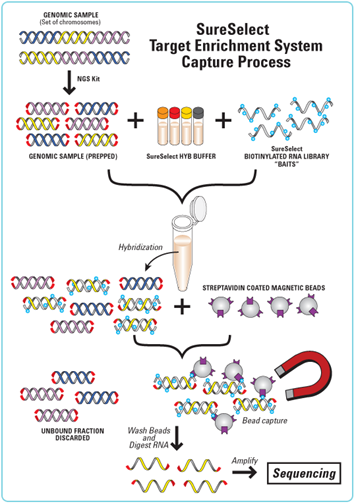

In [6]:
## Bisulfit Capture
from IPython.display import Image                        
url='http://epigenie.com/wp-content/uploads/2011/12/Agilent-SureSelect-Body-Graphic-2.png'
Image(url,width=500, height=250)

In [7]:
import pandas as pd


In [15]:
target_bed = pd.read_table("./S3047112.target_covered.bed",header=None)
target_bed.head(5)

,0,1,2,3,4,5
0,chr1,564968,570248,P1_8,0,+
1,chr1,837164,837884,P1_9,0,+
2,chr1,838110,842269,P1_9,0,+
3,chr1,966764,971804,P1_10,0,+
4,chr1,1101288,1101408,P1_11,0,+


## Using bedtools 

to count reads overlapped the targetted interval and count bases in the overlapping regions. Do alignment accoding to bisulfite pipeline documentation and obtain BAM files for each sample.

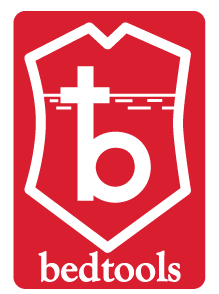

In [40]:
from IPython.display import Image                        
url='http://bedtools.readthedocs.io/en/latest/_static/bedtools.swiss.png'
Image(url,width=100, height=160)

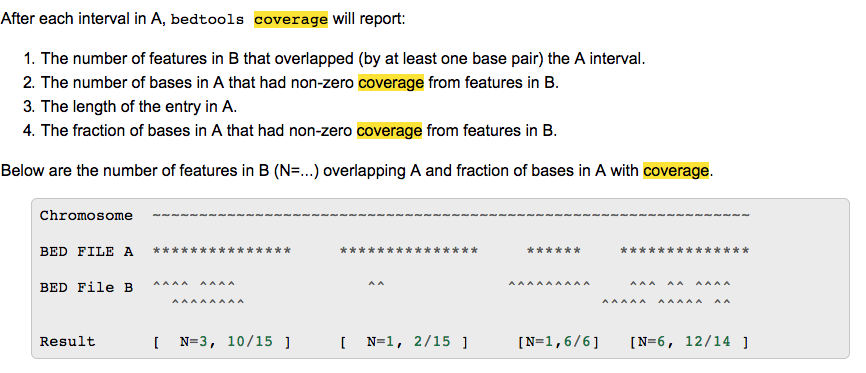

In [41]:

from IPython.display import Image
Image(filename='bed_cov.png') 

```bash

#!/bin/sh
#SBATCH --time=16:00:00 -n24 -p bynode

for i in 1 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20
do

samtools sort  -o BS_CAP_$i.read1_val_1_bismark_bt2_pe.sort.bam -@ 48 -m 2G BS_CAP_$i.read1_val_1_bismark_bt2_pe.bam
samtools index BS_CAP_$i.read1_val_1_bismark_bt2_pe.sort.bam
~/bin/bedtools2/bin/bedtools coverage -a S3047112.target_covered.bed -b BS_CAP_$i.read1_val_1_bismark_bt2_pe.sort.bam -bed
samtools bedcov S3047112.target_covered.bed BS_CAP_$i.read1_val_1_bismark_bt2_pe.sort.bam > BS_CAP_$i.bedcount
done

```


In [60]:
#bases overlapping region
import glob
bed_files = sorted(glob.glob("./sam_cov/*.bedcount"))
print (bed_files)
for file in bed_files:
    bed_cov = pd.read_table(file,header=None)
    bed_cov.columns = ["v1","v2","v3","v4","v5","v6","v7"]
    print (bed_cov.v7.sum())

['./sam_cov/BS_CAP_1.bedcount', './sam_cov/BS_CAP_10.bedcount', './sam_cov/BS_CAP_11.bedcount', './sam_cov/BS_CAP_12.bedcount', './sam_cov/BS_CAP_13.bedcount', './sam_cov/BS_CAP_14.bedcount', './sam_cov/BS_CAP_15.bedcount', './sam_cov/BS_CAP_16.bedcount', './sam_cov/BS_CAP_17.bedcount', './sam_cov/BS_CAP_18.bedcount', './sam_cov/BS_CAP_19.bedcount', './sam_cov/BS_CAP_20.bedcount', './sam_cov/BS_CAP_6.bedcount', './sam_cov/BS_CAP_7.bedcount', './sam_cov/BS_CAP_8.bedcount', './sam_cov/BS_CAP_9.bedcount']
321294398
286501096
213994413
238319902
311108802
314076298
321577228
310400027
278366893
302519337
327315888
233018553
317069642
294002742
288966537
284967196


In [55]:
#reads overlapping region
bed_files = glob.glob("./bed_cov/*.bed")
for file in bed_files:
    bed_cov = pd.read_table(file,header=None)
    bed_cov.columns = ["v1","v2","v3","v4","v5","v6","v7","v8","v9","v10","v11"]
    print (bed_cov.v8.sum())

3557144
3173519
2370728
2637668
3444217
3477544
3561621
3438990
3082733
3347085
3627168
2580836
3512907
3252992
3199702
3154062


In [64]:
# get total reads from bismark mapping report
# each read is considered as 100bp
pd.read_excel("./coverage_stat.xlsx")

,Reads_overlapping_region,total_reads,reads_on_target,bases_overlapping_region,total_read_size,bases_on_target
BS_CAP_1,3557144,4831053,0.736308,321294398,483105300,0.665061
BS_CAP_10,3173519,4319241,0.734740,286501096,431924100,0.663314
BS_CAP_11,2370728,4374844,0.541900,213994413,437484400,0.489148
BS_CAP_12,2637668,4351770,0.606114,238319902,435177000,0.547639
BS_CAP_13,3444217,4577713,0.752388,311108802,457771300,0.679616
BS_CAP_14,3477544,4686393,0.742051,314076298,468639300,0.670188
BS_CAP_15,3561621,4674161,0.761981,321577228,467416100,0.687989
BS_CAP_16,3438990,4523722,0.760212,310400027,452372200,0.686161
BS_CAP_17,3082733,4177280,0.737976,278366893,417728000,0.666383
BS_CAP_18,3347085,4357185,0.768176,302519337,435718500,0.694300
